In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local':new_dataset3})

train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
#train_stats.pop("local3")
train_stats = train_stats.transpose()
train_stats

#레이블
train_labels = train_dataset#.pop('local3')
test_labels = test_dataset#.pop('local3')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [6]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [7]:
model = build_model()

In [8]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 4s 2ms/step - loss: 13903546286080.0000 - mae: 2068892.0000 - mse: 13903546286080.0000 - val_loss: 11072804225024.0000 - val_mae: 1848343.0000 - val_mse: 11072804225024.0000
Epoch 2/1000
870/870 [==============================] - 2s 2ms/step - loss: 4903161298944.0000 - mae: 1226495.3750 - mse: 4903161298944.0000 - val_loss: 383703547904.0000 - val_mae: 473305.9375 - val_mse: 383703547904.0000
Epoch 3/1000
870/870 [==============================] - 2s 2ms/step - loss: 83253788672.0000 - mae: 224455.2500 - mse: 83253788672.0000 - val_loss: 27887439872.0000 - val_mae: 156949.5156 - val_mse: 27887439872.0000
Epoch 4/1000
870/870 [==============================] - 2s 2ms/step - loss: 26414962688.0000 - mae: 151346.3750 - mse: 26414962688.0000 - val_loss: 25062541312.0000 - val_mae: 146291.2500 - val_mse: 25062541312.0000
Epoch 5/1000
870/870 [==============================] - 2s 2ms/step - loss: 24131923968.0000 - mae: 143395.4219 - m

Epoch 43/1000
870/870 [==============================] - 2s 2ms/step - loss: 138263.6562 - mae: 116.6749 - mse: 138263.6562 - val_loss: 4746.7749 - val_mae: 46.5067 - val_mse: 4746.7749
Epoch 44/1000
870/870 [==============================] - 2s 2ms/step - loss: 84437.5625 - mae: 136.7895 - mse: 84437.5625 - val_loss: 47811.0625 - val_mae: 159.9573 - val_mse: 47811.0625
Epoch 45/1000
870/870 [==============================] - 2s 2ms/step - loss: 267710.7812 - mae: 135.0718 - mse: 267710.7812 - val_loss: 8605.4326 - val_mae: 54.2823 - val_mse: 8605.4326
Epoch 46/1000
870/870 [==============================] - 2s 2ms/step - loss: 42736.5156 - mae: 99.2249 - mse: 42736.5156 - val_loss: 5430.4858 - val_mae: 50.5652 - val_mse: 5430.4858
Epoch 47/1000
870/870 [==============================] - 2s 2ms/step - loss: 123311.5703 - mae: 160.3515 - mse: 123311.5703 - val_loss: 281333.0312 - val_mae: 458.5029 - val_mse: 281333.0312
Epoch 48/1000
870/870 [==============================] - 2s 2ms/ste

Epoch 87/1000
870/870 [==============================] - 2s 2ms/step - loss: 505914.1250 - mae: 201.6265 - mse: 505914.1250 - val_loss: 2958732.7500 - val_mae: 1172.0181 - val_mse: 2958732.7500
Epoch 88/1000
870/870 [==============================] - 2s 2ms/step - loss: 24374.9121 - mae: 55.4317 - mse: 24374.9121 - val_loss: 2772.7573 - val_mae: 34.7963 - val_mse: 2772.7573
Epoch 89/1000
870/870 [==============================] - 2s 2ms/step - loss: 49666.8789 - mae: 100.7166 - mse: 49666.8789 - val_loss: 23929.3203 - val_mae: 109.4115 - val_mse: 23929.3203
Epoch 90/1000
870/870 [==============================] - 2s 2ms/step - loss: 226692.7656 - mae: 128.0011 - mse: 226692.7656 - val_loss: 10817.6035 - val_mae: 72.2757 - val_mse: 10817.6035
Epoch 91/1000
870/870 [==============================] - 2s 2ms/step - loss: 8747.8760 - mae: 50.9924 - mse: 8747.8760 - val_loss: 4227.6875 - val_mae: 40.4880 - val_mse: 4227.6875
Epoch 92/1000
870/870 [==============================] - 2s 2ms/ste

870/870 [==============================] - 2s 2ms/step - loss: 28119.4180 - mae: 79.1679 - mse: 28119.4180 - val_loss: 12745.0918 - val_mae: 79.9462 - val_mse: 12745.0918
Epoch 132/1000
870/870 [==============================] - 2s 2ms/step - loss: 291961.5312 - mae: 140.9551 - mse: 291961.5312 - val_loss: 2033.1593 - val_mae: 29.5316 - val_mse: 2033.1593
Epoch 133/1000
870/870 [==============================] - 2s 2ms/step - loss: 20947.1699 - mae: 70.4252 - mse: 20947.1699 - val_loss: 11558.6416 - val_mae: 74.6207 - val_mse: 11558.6416
Epoch 134/1000
870/870 [==============================] - 2s 2ms/step - loss: 314931.3125 - mae: 163.5867 - mse: 314931.3125 - val_loss: 1960.7212 - val_mae: 23.4599 - val_mse: 1960.7212
Epoch 135/1000
870/870 [==============================] - 1s 2ms/step - loss: 4365.7617 - mae: 41.3686 - mse: 4365.7617 - val_loss: 2351.4268 - val_mae: 33.5992 - val_mse: 2351.4268
Epoch 136/1000
870/870 [==============================] - 1s 2ms/step - loss: 53248.652

870/870 [==============================] - 1s 2ms/step - loss: 299318.7500 - mae: 139.0473 - mse: 299318.7500 - val_loss: 1824.8955 - val_mae: 23.5065 - val_mse: 1824.8955
Epoch 176/1000
870/870 [==============================] - 2s 2ms/step - loss: 2797.5935 - mae: 32.9355 - mse: 2797.5935 - val_loss: 1468.8235 - val_mae: 22.1911 - val_mse: 1468.8235
Epoch 177/1000
870/870 [==============================] - 1s 2ms/step - loss: 38718.3828 - mae: 88.5917 - mse: 38718.3828 - val_loss: 117503.7969 - val_mae: 186.7757 - val_mse: 117503.7969
Epoch 178/1000
870/870 [==============================] - 2s 2ms/step - loss: 238792.2500 - mae: 105.0836 - mse: 238792.2500 - val_loss: 13377.4990 - val_mae: 85.5963 - val_mse: 13377.4990
Epoch 179/1000
870/870 [==============================] - 1s 2ms/step - loss: 43156.2305 - mae: 91.7248 - mse: 43156.2305 - val_loss: 1721.8320 - val_mae: 28.1674 - val_mse: 1721.8320
Epoch 180/1000
870/870 [==============================] - 2s 2ms/step - loss: 223954

870/870 [==============================] - 2s 2ms/step - loss: 61319.7734 - mae: 112.3185 - mse: 61319.7734 - val_loss: 1853.4396 - val_mae: 32.3878 - val_mse: 1853.4396
Epoch 220/1000
870/870 [==============================] - 1s 2ms/step - loss: 145378.6406 - mae: 152.1668 - mse: 145378.6406 - val_loss: 12648.1416 - val_mae: 76.5461 - val_mse: 12648.1416
Epoch 221/1000
870/870 [==============================] - 2s 2ms/step - loss: 347464.5625 - mae: 175.8215 - mse: 347464.5625 - val_loss: 1322.4817 - val_mae: 23.0592 - val_mse: 1322.4817
Epoch 222/1000
870/870 [==============================] - 2s 2ms/step - loss: 2933.7307 - mae: 33.3724 - mse: 2933.7307 - val_loss: 2925.6243 - val_mae: 41.4701 - val_mse: 2925.6243
Epoch 223/1000
870/870 [==============================] - 2s 2ms/step - loss: 100698.8672 - mae: 118.9176 - mse: 100698.8672 - val_loss: 8062.6099 - val_mae: 60.7384 - val_mse: 8062.6099
Epoch 224/1000
870/870 [==============================] - 2s 2ms/step - loss: 422221.

870/870 [==============================] - 1s 2ms/step - loss: 66281.4766 - mae: 106.1550 - mse: 66281.4766 - val_loss: 8801.3340 - val_mae: 55.3432 - val_mse: 8801.3340
Epoch 264/1000
870/870 [==============================] - 2s 2ms/step - loss: 135324.4844 - mae: 108.5571 - mse: 135324.4844 - val_loss: 5305.9248 - val_mae: 48.8786 - val_mse: 5305.9248
Epoch 265/1000
870/870 [==============================] - 2s 2ms/step - loss: 171790.5312 - mae: 93.8458 - mse: 171790.5312 - val_loss: 960.3563 - val_mae: 16.2869 - val_mse: 960.3563
Epoch 266/1000
870/870 [==============================] - 2s 2ms/step - loss: 79913.8750 - mae: 78.2208 - mse: 79913.8750 - val_loss: 176454.8750 - val_mae: 256.8068 - val_mse: 176454.8750
Epoch 267/1000
870/870 [==============================] - 2s 2ms/step - loss: 146203.5469 - mae: 107.6386 - mse: 146203.5469 - val_loss: 1256.9835 - val_mae: 24.6222 - val_mse: 1256.9835
Epoch 268/1000
870/870 [==============================] - 2s 2ms/step - loss: 29232

870/870 [==============================] - 1s 2ms/step - loss: 125759.0156 - mae: 132.9450 - mse: 125759.0156 - val_loss: 834.5726 - val_mae: 20.2377 - val_mse: 834.5726
Epoch 308/1000
870/870 [==============================] - 1s 2ms/step - loss: 65978.2734 - mae: 113.7790 - mse: 65978.2734 - val_loss: 1191.8778 - val_mae: 27.3958 - val_mse: 1191.8778
Epoch 309/1000
870/870 [==============================] - 1s 2ms/step - loss: 1018800.3750 - mae: 242.6725 - mse: 1018800.3750 - val_loss: 896.6003 - val_mae: 17.8541 - val_mse: 896.6003
Epoch 310/1000
870/870 [==============================] - 2s 2ms/step - loss: 859.7213 - mae: 17.2715 - mse: 859.7213 - val_loss: 678.3842 - val_mae: 13.3899 - val_mse: 678.3842
Epoch 311/1000
870/870 [==============================] - 2s 2ms/step - loss: 991.6863 - mae: 19.6256 - mse: 991.6863 - val_loss: 735.1328 - val_mae: 16.6729 - val_mse: 735.1328
Epoch 312/1000
870/870 [==============================] - 2s 2ms/step - loss: 126136.5625 - mae: 113.7

870/870 [==============================] - 2s 2ms/step - loss: 57517.2188 - mae: 85.3794 - mse: 57517.2188 - val_loss: 3739.6829 - val_mae: 39.6293 - val_mse: 3739.6829
Epoch 352/1000
870/870 [==============================] - 2s 2ms/step - loss: 260317.6250 - mae: 165.2066 - mse: 260317.6250 - val_loss: 1004.2034 - val_mae: 21.8507 - val_mse: 1004.2034
Epoch 353/1000
870/870 [==============================] - 2s 2ms/step - loss: 1259.3810 - mae: 21.7935 - mse: 1259.3810 - val_loss: 3560.7388 - val_mae: 38.3420 - val_mse: 3560.7388
Epoch 354/1000
870/870 [==============================] - 2s 2ms/step - loss: 204667.2344 - mae: 122.5327 - mse: 204667.2344 - val_loss: 1160.0481 - val_mae: 24.3717 - val_mse: 1160.0481
Epoch 355/1000
870/870 [==============================] - 2s 2ms/step - loss: 19915.4766 - mae: 57.5159 - mse: 19915.4766 - val_loss: 827.8820 - val_mae: 21.6262 - val_mse: 827.8820
Epoch 356/1000
870/870 [==============================] - 2s 2ms/step - loss: 109222.4297 - m

Epoch 396/1000
870/870 [==============================] - 2s 2ms/step - loss: 98888.9766 - mae: 94.4150 - mse: 98888.9766 - val_loss: 978.1570 - val_mae: 23.9266 - val_mse: 978.1570
Epoch 397/1000
870/870 [==============================] - 2s 2ms/step - loss: 65771.0078 - mae: 63.8420 - mse: 65771.0078 - val_loss: 16490.1445 - val_mae: 91.5053 - val_mse: 16490.1445
Epoch 398/1000
870/870 [==============================] - 2s 2ms/step - loss: 273297.0312 - mae: 138.0592 - mse: 273297.0312 - val_loss: 791.7014 - val_mae: 15.8986 - val_mse: 791.7014
Epoch 399/1000
870/870 [==============================] - 2s 2ms/step - loss: 1007.9835 - mae: 19.2226 - mse: 1007.9835 - val_loss: 709.9476 - val_mae: 19.4110 - val_mse: 709.9476
Epoch 400/1000
870/870 [==============================] - 2s 2ms/step - loss: 138124.1875 - mae: 78.8797 - mse: 138124.1875 - val_loss: 709.6446 - val_mae: 17.9094 - val_mse: 709.6446
Epoch 401/1000
870/870 [==============================] - 2s 2ms/step - loss: 18523

870/870 [==============================] - 2s 2ms/step - loss: 360557.9375 - mae: 135.5391 - mse: 360557.9375 - val_loss: 3446.3118 - val_mae: 31.0931 - val_mse: 3446.3118
Epoch 441/1000
870/870 [==============================] - 2s 2ms/step - loss: 1837.2274 - mae: 24.5038 - mse: 1837.2274 - val_loss: 4953.3198 - val_mae: 47.5648 - val_mse: 4953.3198
Epoch 442/1000
870/870 [==============================] - 2s 2ms/step - loss: 20640.9512 - mae: 40.3009 - mse: 20640.9512 - val_loss: 144483.5781 - val_mae: 293.9813 - val_mse: 144483.5781
Epoch 443/1000
870/870 [==============================] - 2s 2ms/step - loss: 142900.8125 - mae: 119.2465 - mse: 142900.8125 - val_loss: 634.1610 - val_mae: 16.9467 - val_mse: 634.1610
Epoch 444/1000
870/870 [==============================] - 2s 2ms/step - loss: 33169.5703 - mae: 58.9174 - mse: 33169.5703 - val_loss: 567634.0000 - val_mae: 509.7057 - val_mse: 567634.0000
Epoch 445/1000
870/870 [==============================] - 2s 3ms/step - loss: 51860

870/870 [==============================] - 2s 2ms/step - loss: 1083.8344 - mae: 19.8240 - mse: 1083.8344 - val_loss: 512.0453 - val_mae: 11.3289 - val_mse: 512.0453
Epoch 485/1000
870/870 [==============================] - 2s 2ms/step - loss: 1692766.2500 - mae: 258.0065 - mse: 1692766.2500 - val_loss: 1250.3652 - val_mae: 19.9844 - val_mse: 1250.3652
Epoch 486/1000
870/870 [==============================] - 2s 2ms/step - loss: 778.8293 - mae: 15.1666 - mse: 778.8293 - val_loss: 691.4683 - val_mae: 14.3345 - val_mse: 691.4683
Epoch 487/1000
870/870 [==============================] - 2s 2ms/step - loss: 768.4936 - mae: 16.7087 - mse: 768.4936 - val_loss: 611.5363 - val_mae: 13.7231 - val_mse: 611.5363
Epoch 488/1000
870/870 [==============================] - 2s 2ms/step - loss: 1083.9330 - mae: 19.7957 - mse: 1083.9330 - val_loss: 748.3043 - val_mae: 19.8741 - val_mse: 748.3043
Epoch 489/1000
870/870 [==============================] - 2s 2ms/step - loss: 254112.6094 - mae: 130.9632 - ms

Epoch 529/1000
870/870 [==============================] - 3s 3ms/step - loss: 92529.9922 - mae: 70.7913 - mse: 92529.9922 - val_loss: 309886.0625 - val_mae: 339.5433 - val_mse: 309886.0625
Epoch 530/1000
870/870 [==============================] - 3s 3ms/step - loss: 13395.6162 - mae: 40.6290 - mse: 13395.6162 - val_loss: 489.7614 - val_mae: 12.2523 - val_mse: 489.7614
Epoch 531/1000
870/870 [==============================] - 2s 3ms/step - loss: 96548.7266 - mae: 96.4720 - mse: 96548.7266 - val_loss: 1302.3507 - val_mae: 30.2608 - val_mse: 1302.3507
Epoch 532/1000
870/870 [==============================] - 2s 3ms/step - loss: 575065.8750 - mae: 188.7724 - mse: 575065.8750 - val_loss: 715.8099 - val_mae: 13.9700 - val_mse: 715.8099
Epoch 533/1000
870/870 [==============================] - 3s 3ms/step - loss: 773.7711 - mae: 17.6855 - mse: 773.7711 - val_loss: 846.4511 - val_mae: 23.3284 - val_mse: 846.4511
Epoch 534/1000
870/870 [==============================] - 3s 3ms/step - loss: 1037

870/870 [==============================] - 2s 3ms/step - loss: 9929.0459 - mae: 42.0702 - mse: 9929.0459 - val_loss: 1856.1650 - val_mae: 30.4950 - val_mse: 1856.1650
Epoch 574/1000
870/870 [==============================] - 3s 3ms/step - loss: 356009.2812 - mae: 110.1887 - mse: 356009.2812 - val_loss: 691.0118 - val_mae: 15.4399 - val_mse: 691.0118
Epoch 575/1000
870/870 [==============================] - 3s 3ms/step - loss: 1774.7444 - mae: 19.8033 - mse: 1774.7444 - val_loss: 1277.5372 - val_mae: 23.5461 - val_mse: 1277.5372
Epoch 576/1000
870/870 [==============================] - 3s 3ms/step - loss: 33748.8750 - mae: 56.7377 - mse: 33748.8750 - val_loss: 61037.3008 - val_mae: 158.5438 - val_mse: 61037.3008
Epoch 577/1000
870/870 [==============================] - 3s 3ms/step - loss: 69746.7031 - mae: 62.9674 - mse: 69746.7031 - val_loss: 619.5864 - val_mae: 14.8357 - val_mse: 619.5864
Epoch 578/1000
870/870 [==============================] - 3s 3ms/step - loss: 82786.0625 - mae: 8

870/870 [==============================] - 2s 3ms/step - loss: 90118.3359 - mae: 123.1913 - mse: 90118.3359 - val_loss: 582.1666 - val_mae: 16.0348 - val_mse: 582.1666
Epoch 618/1000
870/870 [==============================] - 2s 3ms/step - loss: 434855.3438 - mae: 149.8464 - mse: 434855.3438 - val_loss: 727.9959 - val_mae: 14.5212 - val_mse: 727.9959
Epoch 619/1000
870/870 [==============================] - 2s 3ms/step - loss: 541.8762 - mae: 14.0974 - mse: 541.8762 - val_loss: 566.9430 - val_mae: 16.3973 - val_mse: 566.9430
Epoch 620/1000
870/870 [==============================] - 2s 3ms/step - loss: 1107.9661 - mae: 19.6530 - mse: 1107.9661 - val_loss: 8503.2764 - val_mae: 65.5824 - val_mse: 8503.2764
Epoch 621/1000
870/870 [==============================] - 2s 3ms/step - loss: 119670.5625 - mae: 126.3258 - mse: 119670.5625 - val_loss: 1415.9017 - val_mae: 33.3662 - val_mse: 1415.9017
Epoch 622/1000
870/870 [==============================] - 2s 3ms/step - loss: 44111.2734 - mae: 50.1

870/870 [==============================] - 3s 3ms/step - loss: 798512.0625 - mae: 137.1565 - mse: 798512.0625 - val_loss: 432.4951 - val_mae: 10.3013 - val_mse: 432.4951
Epoch 662/1000
870/870 [==============================] - 3s 3ms/step - loss: 441.2630 - mae: 12.6960 - mse: 441.2630 - val_loss: 400.3688 - val_mae: 12.0915 - val_mse: 400.3688
Epoch 663/1000
870/870 [==============================] - 3s 4ms/step - loss: 910.2586 - mae: 18.0895 - mse: 910.2586 - val_loss: 1025.9771 - val_mae: 25.7290 - val_mse: 1025.9771
Epoch 664/1000
870/870 [==============================] - 3s 4ms/step - loss: 356498.7812 - mae: 136.0948 - mse: 356498.7812 - val_loss: 431.6126 - val_mae: 9.7625 - val_mse: 431.6126
Epoch 665/1000
870/870 [==============================] - 3s 3ms/step - loss: 535.5401 - mae: 14.4860 - mse: 535.5401 - val_loss: 424.8932 - val_mae: 14.0418 - val_mse: 424.8932
Epoch 666/1000
870/870 [==============================] - 3s 3ms/step - loss: 104209.6094 - mae: 97.9273 - mse

870/870 [==============================] - 3s 4ms/step - loss: 749.8433 - mae: 17.5118 - mse: 749.8433 - val_loss: 510.2732 - val_mae: 12.8619 - val_mse: 510.2732
Epoch 706/1000
870/870 [==============================] - 3s 4ms/step - loss: 1513.1217 - mae: 23.0417 - mse: 1513.1217 - val_loss: 4052.0010 - val_mae: 45.7177 - val_mse: 4052.0010
Epoch 707/1000
870/870 [==============================] - 3s 4ms/step - loss: 185398.5156 - mae: 152.3047 - mse: 185398.5156 - val_loss: 551.4258 - val_mae: 17.0531 - val_mse: 551.4258
Epoch 708/1000
870/870 [==============================] - 3s 4ms/step - loss: 2835.9492 - mae: 27.8174 - mse: 2835.9492 - val_loss: 431.6556 - val_mae: 13.3682 - val_mse: 431.6556
Epoch 709/1000
870/870 [==============================] - 3s 3ms/step - loss: 1080392.8750 - mae: 226.3161 - mse: 1080392.8750 - val_loss: 488.1686 - val_mae: 13.2154 - val_mse: 488.1686
Epoch 710/1000
870/870 [==============================] - 3s 4ms/step - loss: 447.6195 - mae: 12.9361 -

Epoch 750/1000
870/870 [==============================] - 3s 4ms/step - loss: 69691.3203 - mae: 80.9364 - mse: 69691.3203 - val_loss: 119533.5781 - val_mae: 192.8928 - val_mse: 119533.5781
Epoch 751/1000
870/870 [==============================] - 3s 3ms/step - loss: 154509.7500 - mae: 102.5251 - mse: 154509.7500 - val_loss: 406.4614 - val_mae: 12.9279 - val_mse: 406.4614
Epoch 752/1000
870/870 [==============================] - 3s 4ms/step - loss: 41889.4375 - mae: 72.5252 - mse: 41889.4375 - val_loss: 1271.6906 - val_mae: 24.2705 - val_mse: 1271.6906
Epoch 753/1000
870/870 [==============================] - 3s 3ms/step - loss: 169133.7812 - mae: 112.2393 - mse: 169133.7812 - val_loss: 590.1014 - val_mae: 19.5767 - val_mse: 590.1014
Epoch 754/1000
870/870 [==============================] - 3s 3ms/step - loss: 3132.8945 - mae: 26.3090 - mse: 3132.8945 - val_loss: 391.0554 - val_mae: 10.0337 - val_mse: 391.0554
Epoch 755/1000
870/870 [==============================] - 3s 4ms/step - loss:

870/870 [==============================] - 3s 3ms/step - loss: 9724.9492 - mae: 39.4481 - mse: 9724.9492 - val_loss: 1918.4081 - val_mae: 32.3373 - val_mse: 1918.4081
Epoch 847/1000
870/870 [==============================] - 3s 3ms/step - loss: 117342.1797 - mae: 80.2489 - mse: 117342.1797 - val_loss: 402.0035 - val_mae: 12.7913 - val_mse: 402.0035
Epoch 848/1000
870/870 [==============================] - 3s 3ms/step - loss: 192544.3125 - mae: 118.7987 - mse: 192544.3125 - val_loss: 850.7956 - val_mae: 22.2700 - val_mse: 850.7956
Epoch 849/1000
870/870 [==============================] - 3s 3ms/step - loss: 186668.9062 - mae: 105.3186 - mse: 186668.9062 - val_loss: 5949.1460 - val_mae: 48.3419 - val_mse: 5949.1460
Epoch 850/1000
870/870 [==============================] - 3s 3ms/step - loss: 1253.1272 - mae: 19.0407 - mse: 1253.1272 - val_loss: 2757.0024 - val_mae: 32.9224 - val_mse: 2757.0024
Epoch 851/1000
870/870 [==============================] - 3s 3ms/step - loss: 37276.3438 - mae:

Epoch 891/1000
870/870 [==============================] - 2s 3ms/step - loss: 103699.2266 - mae: 97.9113 - mse: 103699.2266 - val_loss: 367.6590 - val_mae: 13.3485 - val_mse: 367.6590
Epoch 892/1000
870/870 [==============================] - 2s 3ms/step - loss: 507090.0938 - mae: 152.8896 - mse: 507090.0938 - val_loss: 1677.7628 - val_mae: 31.6443 - val_mse: 1677.7628
Epoch 893/1000
870/870 [==============================] - 2s 3ms/step - loss: 482.7875 - mae: 13.4289 - mse: 482.7875 - val_loss: 405.1537 - val_mae: 14.7061 - val_mse: 405.1537
Epoch 894/1000
870/870 [==============================] - 2s 3ms/step - loss: 66169.7266 - mae: 66.4336 - mse: 66169.7266 - val_loss: 71055.0703 - val_mae: 214.6630 - val_mse: 71055.0703
Epoch 895/1000
870/870 [==============================] - 2s 3ms/step - loss: 20238.1797 - mae: 60.4640 - mse: 20238.1797 - val_loss: 1054.2238 - val_mae: 24.1902 - val_mse: 1054.2238
Epoch 896/1000
870/870 [==============================] - 2s 3ms/step - loss: 19

Epoch 936/1000
870/870 [==============================] - 2s 2ms/step - loss: 1090.6276 - mae: 17.9925 - mse: 1090.6276 - val_loss: 19156.4141 - val_mae: 100.2900 - val_mse: 19156.4141
Epoch 937/1000
870/870 [==============================] - 2s 2ms/step - loss: 170968.2500 - mae: 84.8070 - mse: 170968.2500 - val_loss: 347.8191 - val_mae: 11.5440 - val_mse: 347.8191
Epoch 938/1000
870/870 [==============================] - 2s 2ms/step - loss: 217280.8594 - mae: 110.4672 - mse: 217280.8594 - val_loss: 833.3429 - val_mae: 16.5687 - val_mse: 833.3429
Epoch 939/1000
870/870 [==============================] - 2s 2ms/step - loss: 632.5419 - mae: 15.5128 - mse: 632.5419 - val_loss: 891.6526 - val_mae: 18.2199 - val_mse: 891.6526
Epoch 940/1000
870/870 [==============================] - 2s 2ms/step - loss: 995408.0625 - mae: 198.0210 - mse: 995408.0625 - val_loss: 94403.0078 - val_mae: 221.2007 - val_mse: 94403.0078
Epoch 941/1000
870/870 [==============================] - 2s 2ms/step - loss: 

870/870 [==============================] - 2s 2ms/step - loss: 514.5859 - mae: 13.4466 - mse: 514.5859 - val_loss: 386.3249 - val_mae: 11.7894 - val_mse: 386.3249
Epoch 981/1000
870/870 [==============================] - 2s 2ms/step - loss: 12043.3564 - mae: 39.8449 - mse: 12043.3564 - val_loss: 419.9458 - val_mae: 12.2848 - val_mse: 419.9458
Epoch 982/1000
870/870 [==============================] - 2s 2ms/step - loss: 297503.4375 - mae: 135.8380 - mse: 297503.4375 - val_loss: 444.3255 - val_mae: 12.0366 - val_mse: 444.3255
Epoch 983/1000
870/870 [==============================] - 2s 3ms/step - loss: 1902.9547 - mae: 20.8310 - mse: 1902.9547 - val_loss: 23831.5879 - val_mae: 96.1182 - val_mse: 23831.5879
Epoch 984/1000
870/870 [==============================] - 3s 3ms/step - loss: 55004.6719 - mae: 71.7567 - mse: 55004.6719 - val_loss: 706.5212 - val_mae: 16.5901 - val_mse: 706.5212
Epoch 985/1000
870/870 [==============================] - 2s 2ms/step - loss: 84924.2500 - mae: 115.1073

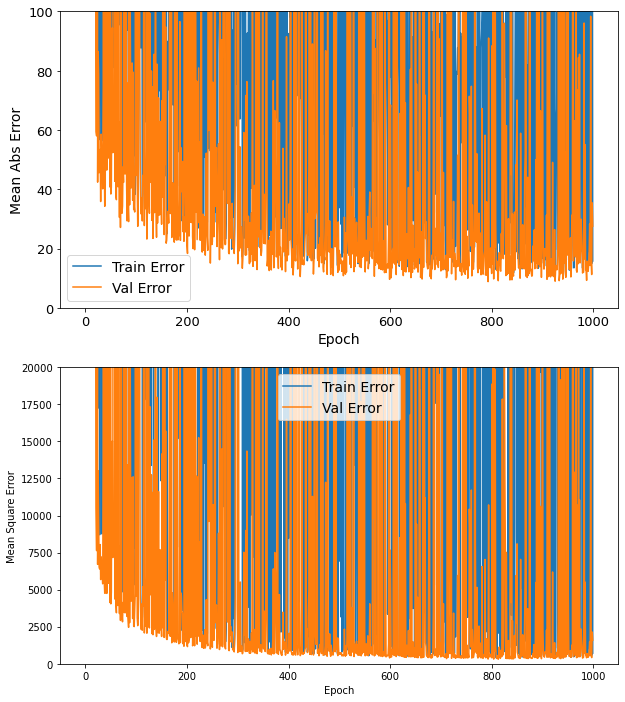

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,100])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [10]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 1558.2091 - mae: 27.2549 - mse: 1558.2091 - 245ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차: 27.25 local1


In [11]:
255/255 - 0s - loss: 0.8072 - mae: 0.2181 - mse: 0.8072 - 167ms/epoch - 653us/step
테스트 세트의 평균 절대 오차:  0.22 local1

SyntaxError: invalid syntax (1905696191.py, line 1)

In [ ]:
255/255 - 0s - loss: 0.3733 - mae: 0.2341 - mse: 0.3733 - 148ms/epoch - 580us/step
테스트 세트의 평균 절대 오차:  0.23 local1